In [2]:
from matplotlib import pyplot as plt
import numpy as np
from euler_cromer import simulate

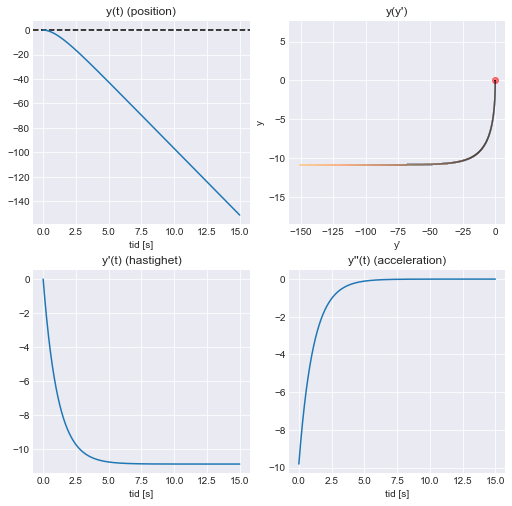

gränshastighet:  -10.89487120584911 m/s


In [65]:
m = 0.5
g = 9.82
rho = 1420  # honungens densitet
r = 0.005   # radie
b = 90 * r # dämpningskonstant

def acceleration(y, v, t):
    # negativ riktning neråt, honungen är vid y <= 0
    h = np.clip(r-y, 0, 2*r)
    V_under_surface = (1/3)*np.pi * h**2 * (3*r - h)
    F_lyft = rho * V_under_surface * g # lyftkraft = tyngden av undanträngd volym
    F_d = b*-v * (r-y > 0) # dämpande kraft finns bara när kulan är i honungen
    F_g = -m*g
    return (F_g + F_lyft + F_d) / m

y0, v0 = 0, 0
sol = simulate(acceleration, [y0, v0], dt=0.001, to_time=15)
print('gränshastighet: ', sol['y_prime'][-1], 'm/s')

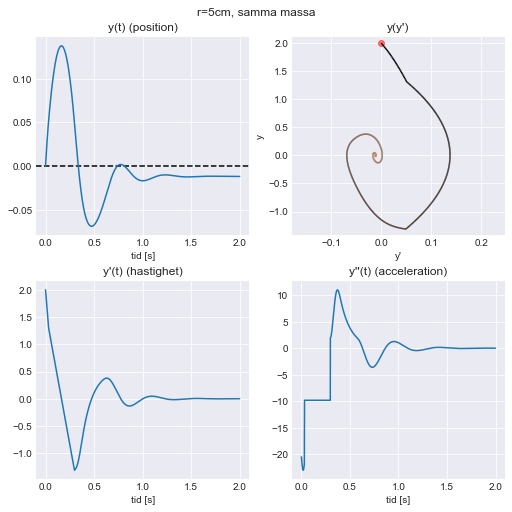

In [18]:
r = 0.05 # 10 ggr större radie
b = 90 * r
sol = simulate(acceleration, [0, 2], dt=0.001, to_time=2, title='r=5cm, samma massa')

In [66]:
v_terminal = []
v0s = np.linspace(-5, 5, 10)
for v0 in v0s:
    r, m = 0.005, 0.5
    sol = simulate(acceleration, [0, v0], dt=0.01, to_time=20, plot=False)
    v_terminal.append(sol['speed'][-1])

print(v_terminal)

[-10.894885981459819, -10.894885965720249, -10.894885949980688, -10.894885934241112, -10.894885918501544, -10.89488590278107, -10.894885887311903, -10.894885872892973, -10.89488586168541, -10.894885854011298]


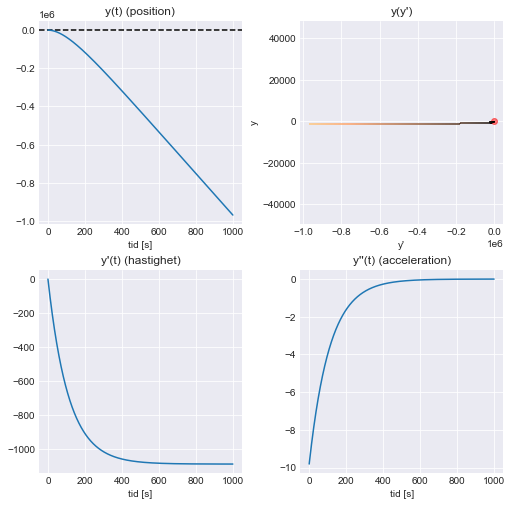

-1089.9277141763198


In [63]:
r, m = 0.005, 0.5
rho = 918
b = 0.9 * r
sol = simulate(acceleration, [0, 0], dt=0.01, to_time=1000)
print(sol['speed'][-1])